In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
import statsmodels
import pylab as py
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# read data into a first data frame
house = pd.read_csv('D:\\Work\\PG Programe\\Advanced Regression Assignment\\train.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
house.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [7]:
# display the column names that have missing values
house.columns[house.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
#check the percentage of missing data to make decisions on working with the missing data
nullval = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(10)

,Null values in %
Feature names,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55


In [9]:
#dropping all columns with 45% and more missing values
columns_nan =  house.columns[house.isnull().any()]
for col in columns_nan:
    if house[col].isnull().sum()*100/house.shape[0]>45:
        house.drop(col,axis=1, inplace=True)

In [10]:
house.shape

(1460, 75)

In [11]:
#check the percentage of missing data to make decisions on working with the missing data
nullval = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(10)

,Null values in %
Feature names,
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55
GarageQual,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtFinType1,2.53


### with the above code, columns which have more than 45% null values are removed. 


In [12]:
columns_nan =  house.columns[house.isnull().any()]

for c in columns_nan:
    print(c, house[c].isnull().sum())

LotFrontage 259
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [13]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [14]:
house.shape

(1460, 75)

In [15]:
#categorical values: imputing the mode
house['LotFrontage']=house['LotFrontage'].fillna(house['LotFrontage'].median())
house['GarageYrBlt']=house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())
house['MasVnrArea']=house['MasVnrArea'].fillna(house['MasVnrArea'].median())

for col in ('MasVnrArea','GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual', 'Electrical'):
    house[col] = house[col].fillna(house[col].mode()[0])

In [16]:
columns_nan =  house.columns[house.isnull().any()]

for c in columns_nan:
    print(c, house[c].isnull().sum())

In [17]:
 house.shape

(1460, 75)

<Figure size 1000x500 with 0 Axes>

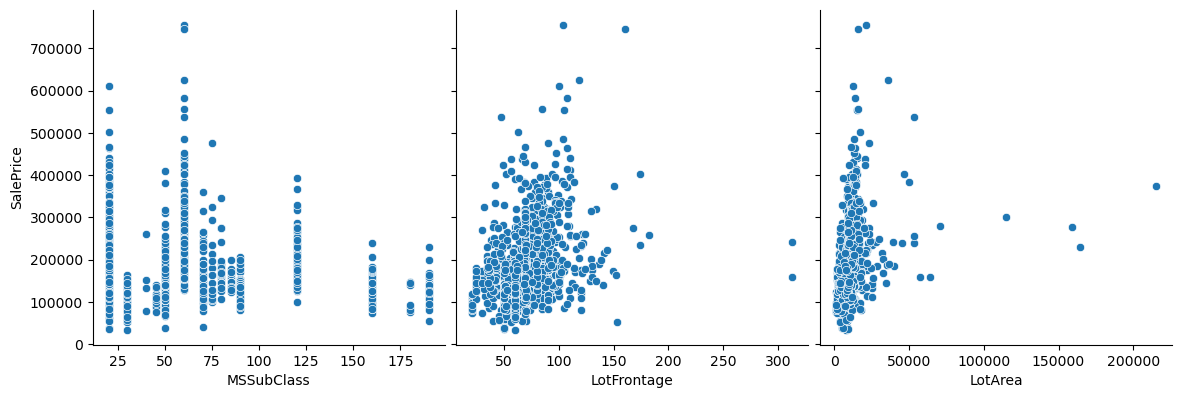

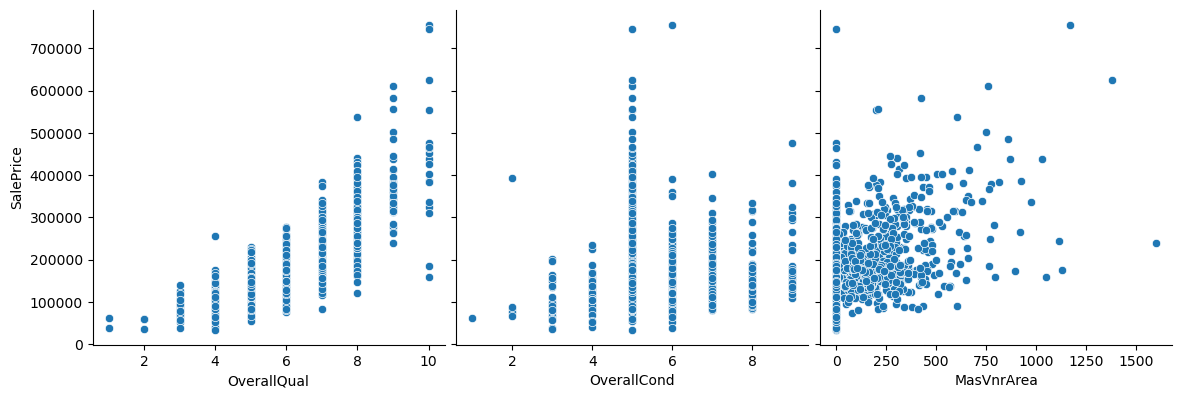

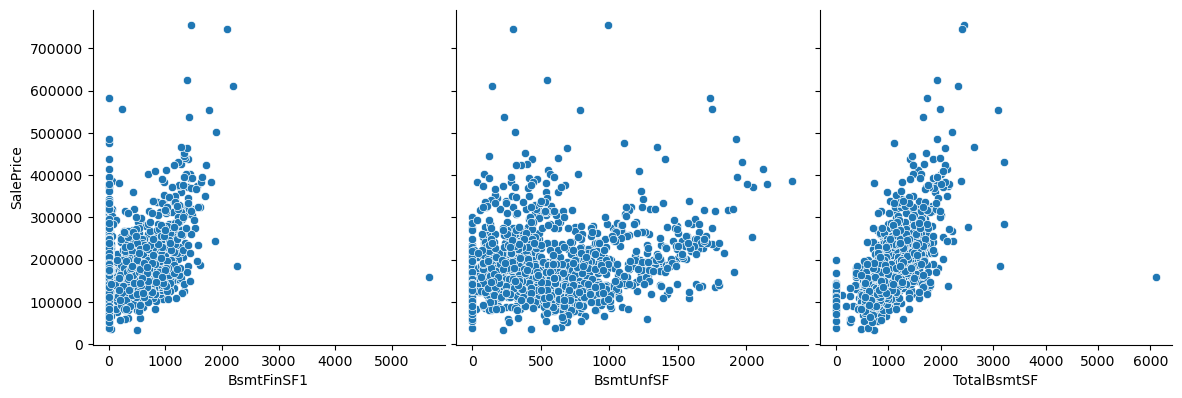

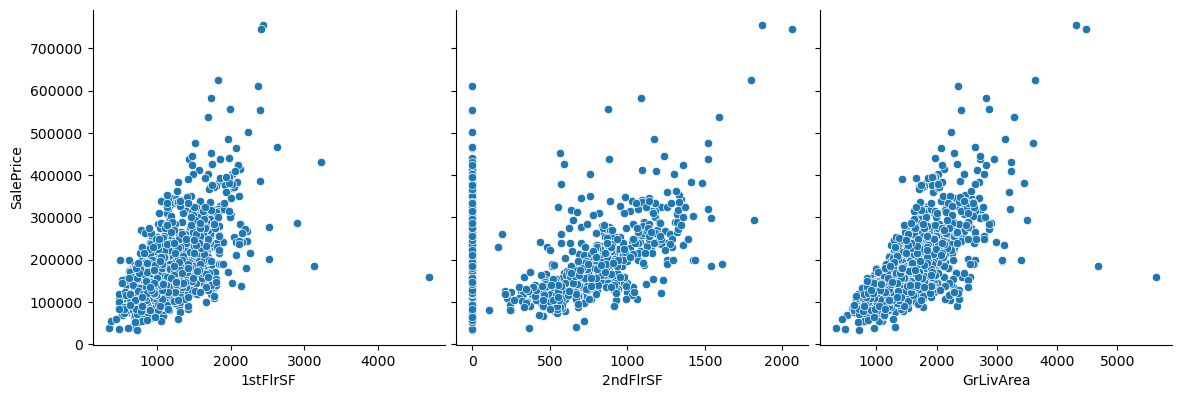

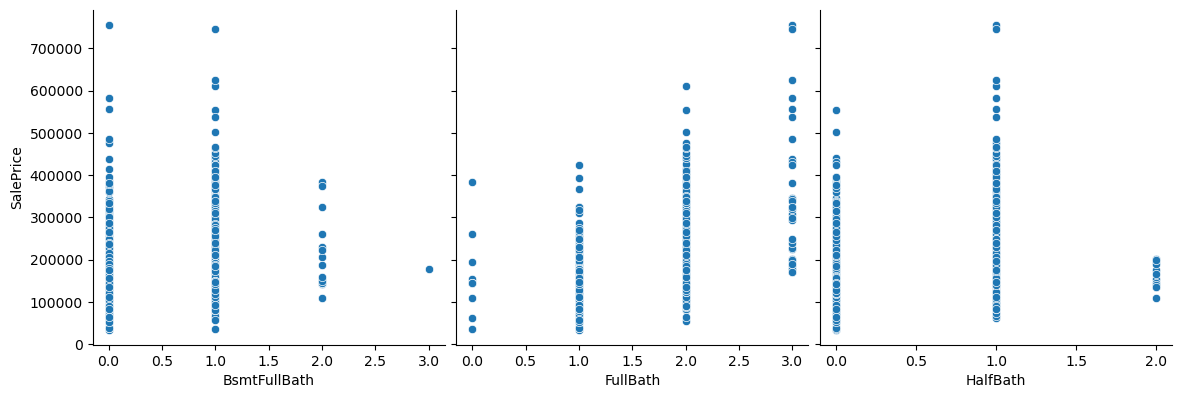

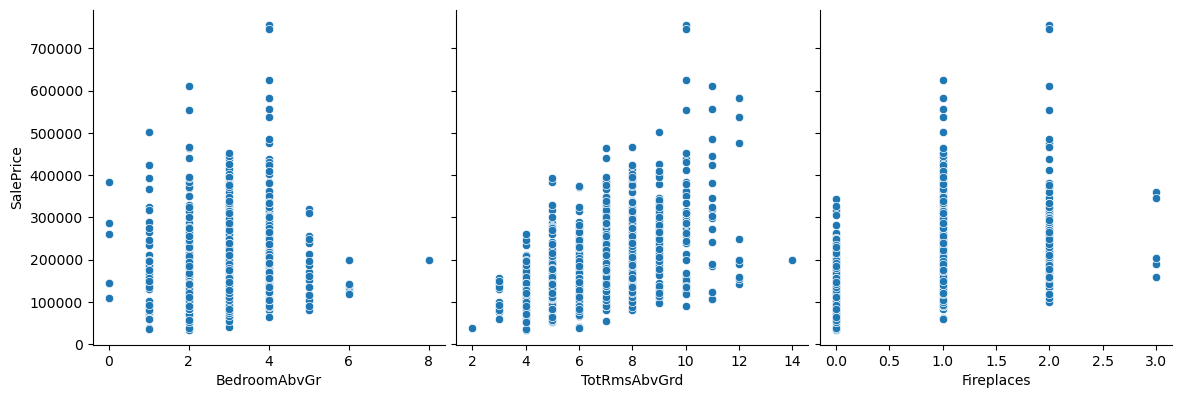

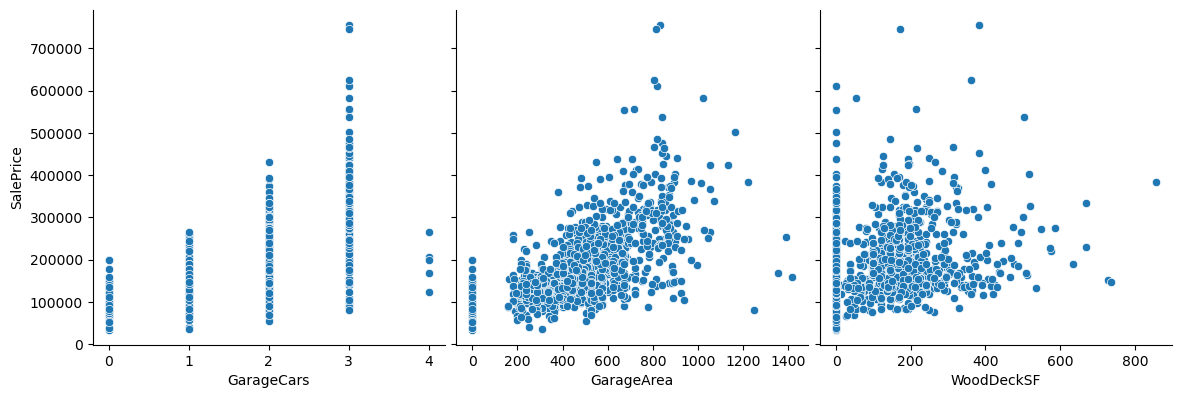

In [18]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

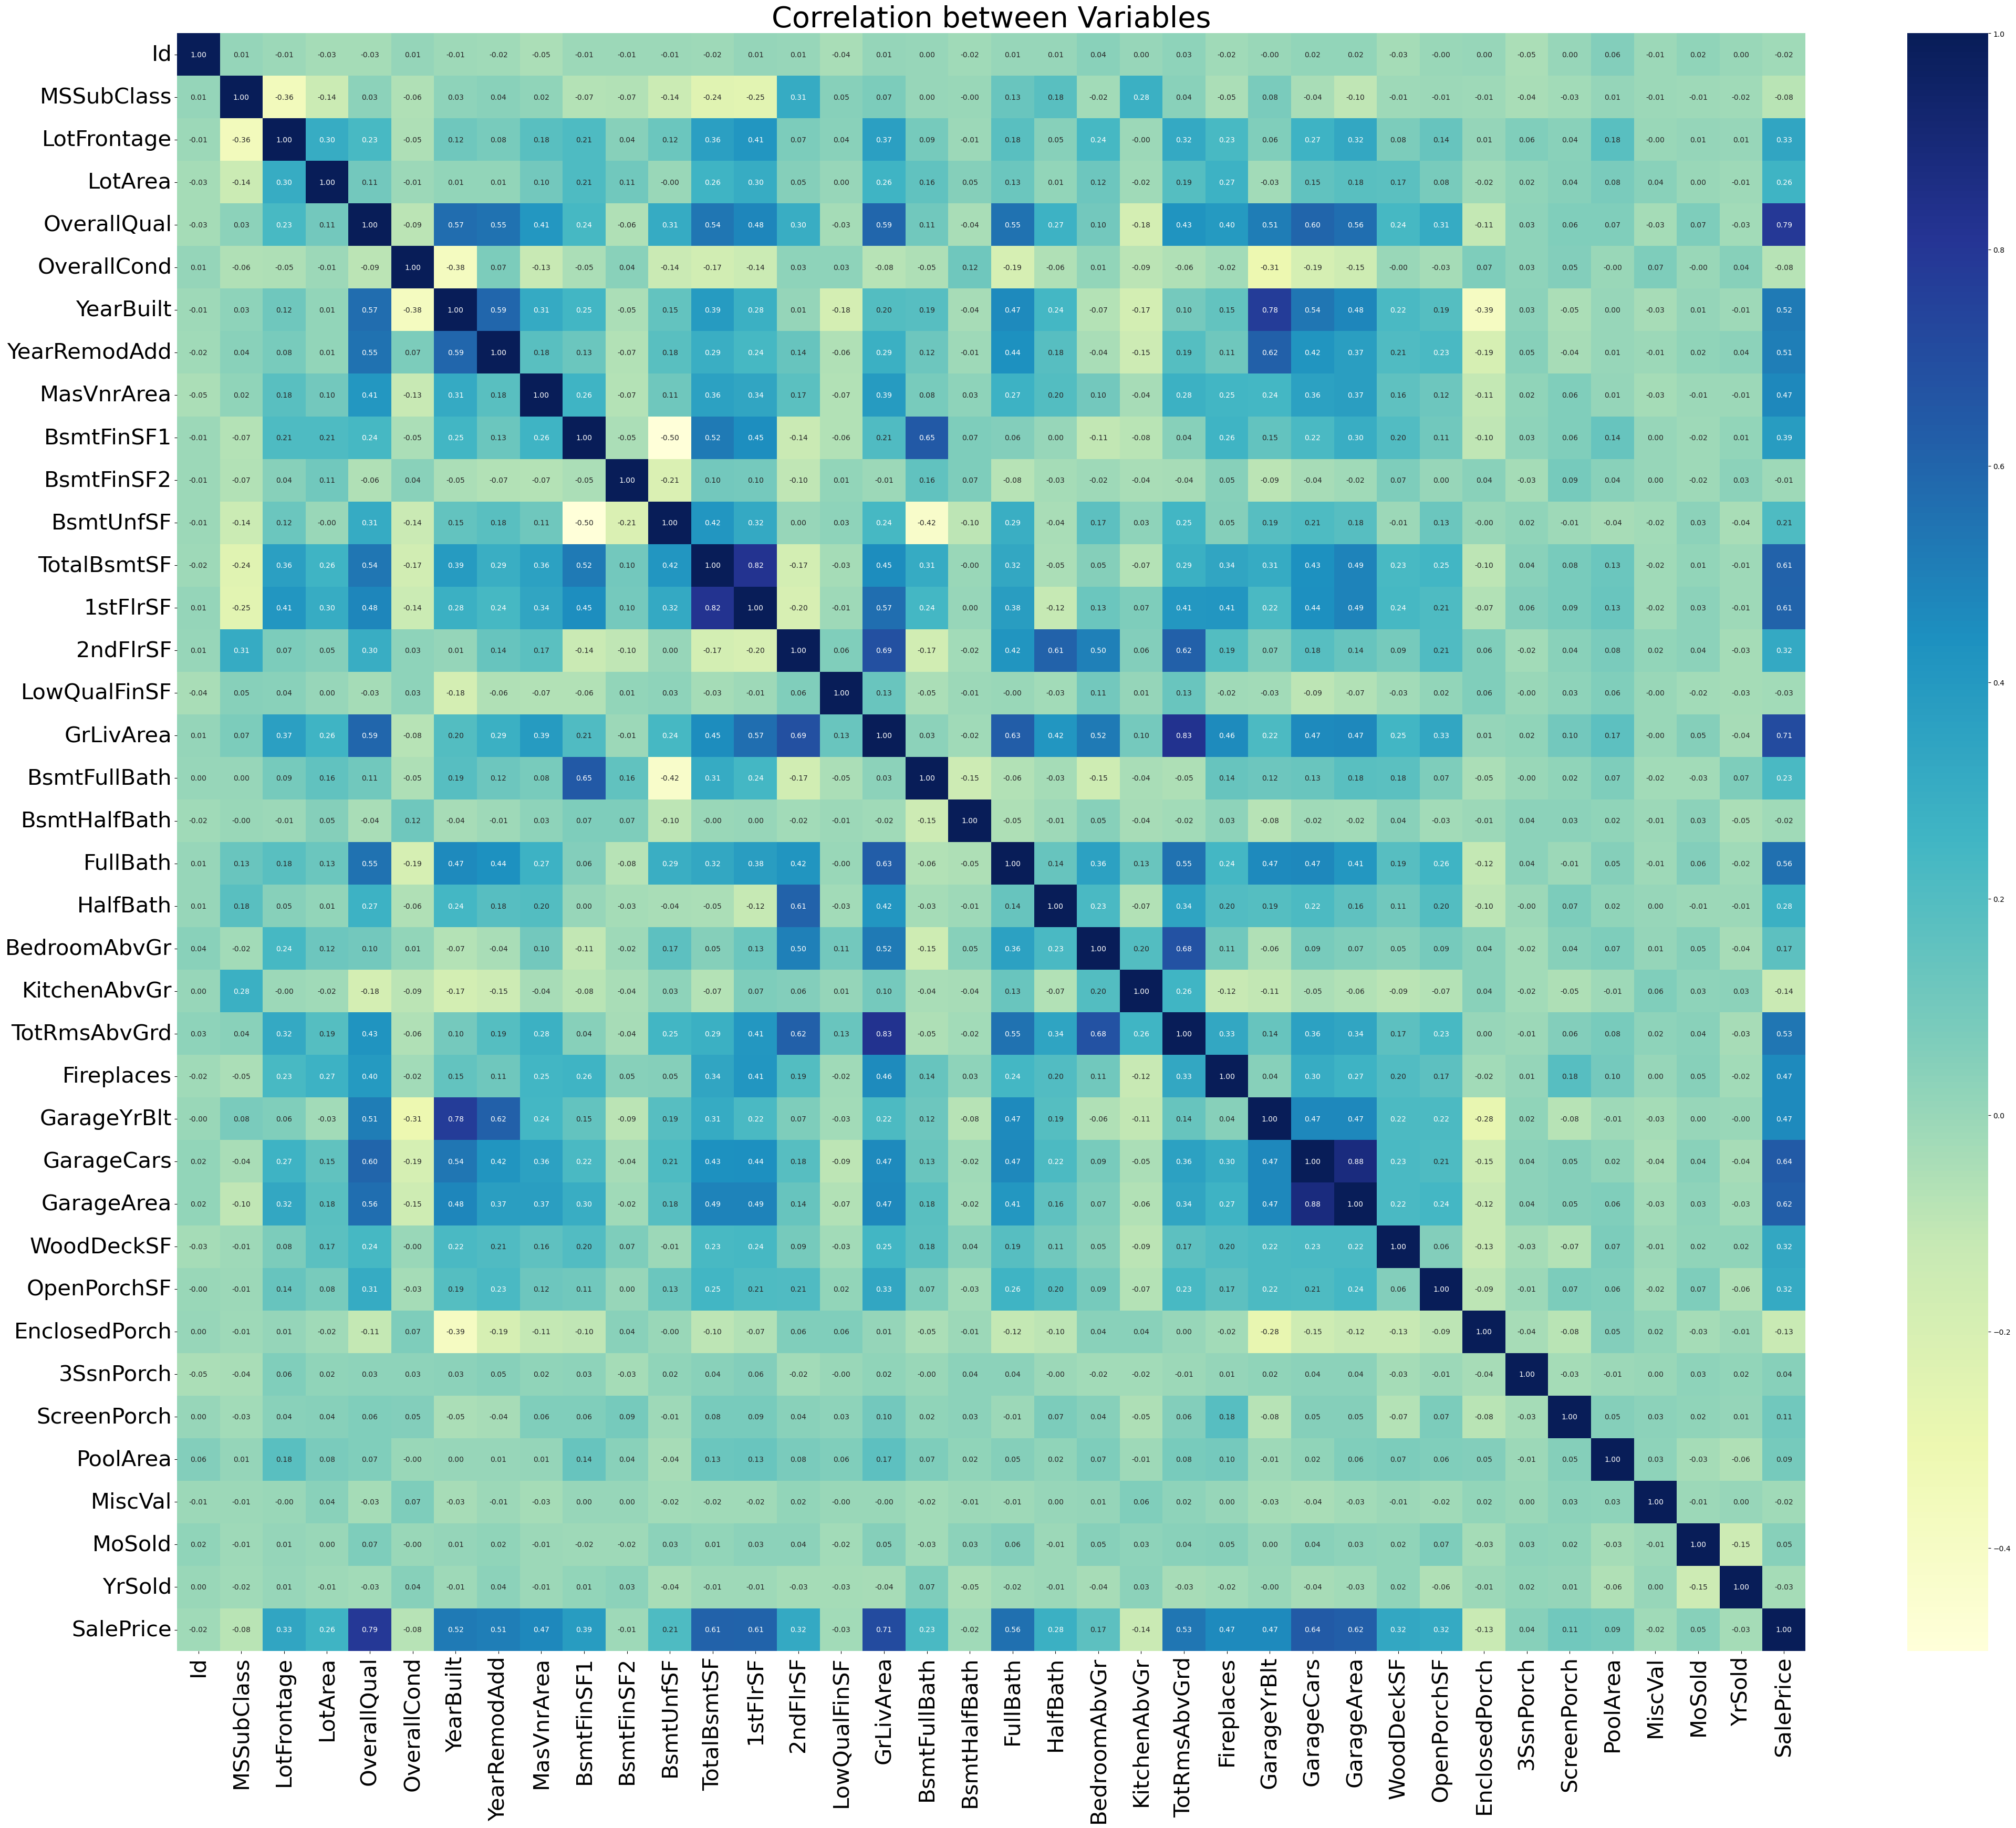

In [19]:
# plotting correlations on a heatmap

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
house_num = house.select_dtypes(include=['float64', 'int64'])
cor = house_num.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

Finding some of the multi-collinear variables
- `GarageArea` and `GarageCars` are highly correlated
- `Yearbuilt` `GarageYrBlt` are highly correlated
- `TotRmsAbvGrd` `GrLivArea` are highly correlated
- `1stFlrSF` `TotalBsmtSF` are highly correlated


In [20]:
## Dropping them
house.drop(['Id','1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)

In [21]:
house.shape

(1460, 70)

In [22]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = house[cols].quantile(0.05)
Q3 = house[cols].quantile(0.95)
IQR = Q3 - Q1

house = house[~((house[cols] < (Q1 - 1.5 * IQR)) |(house[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

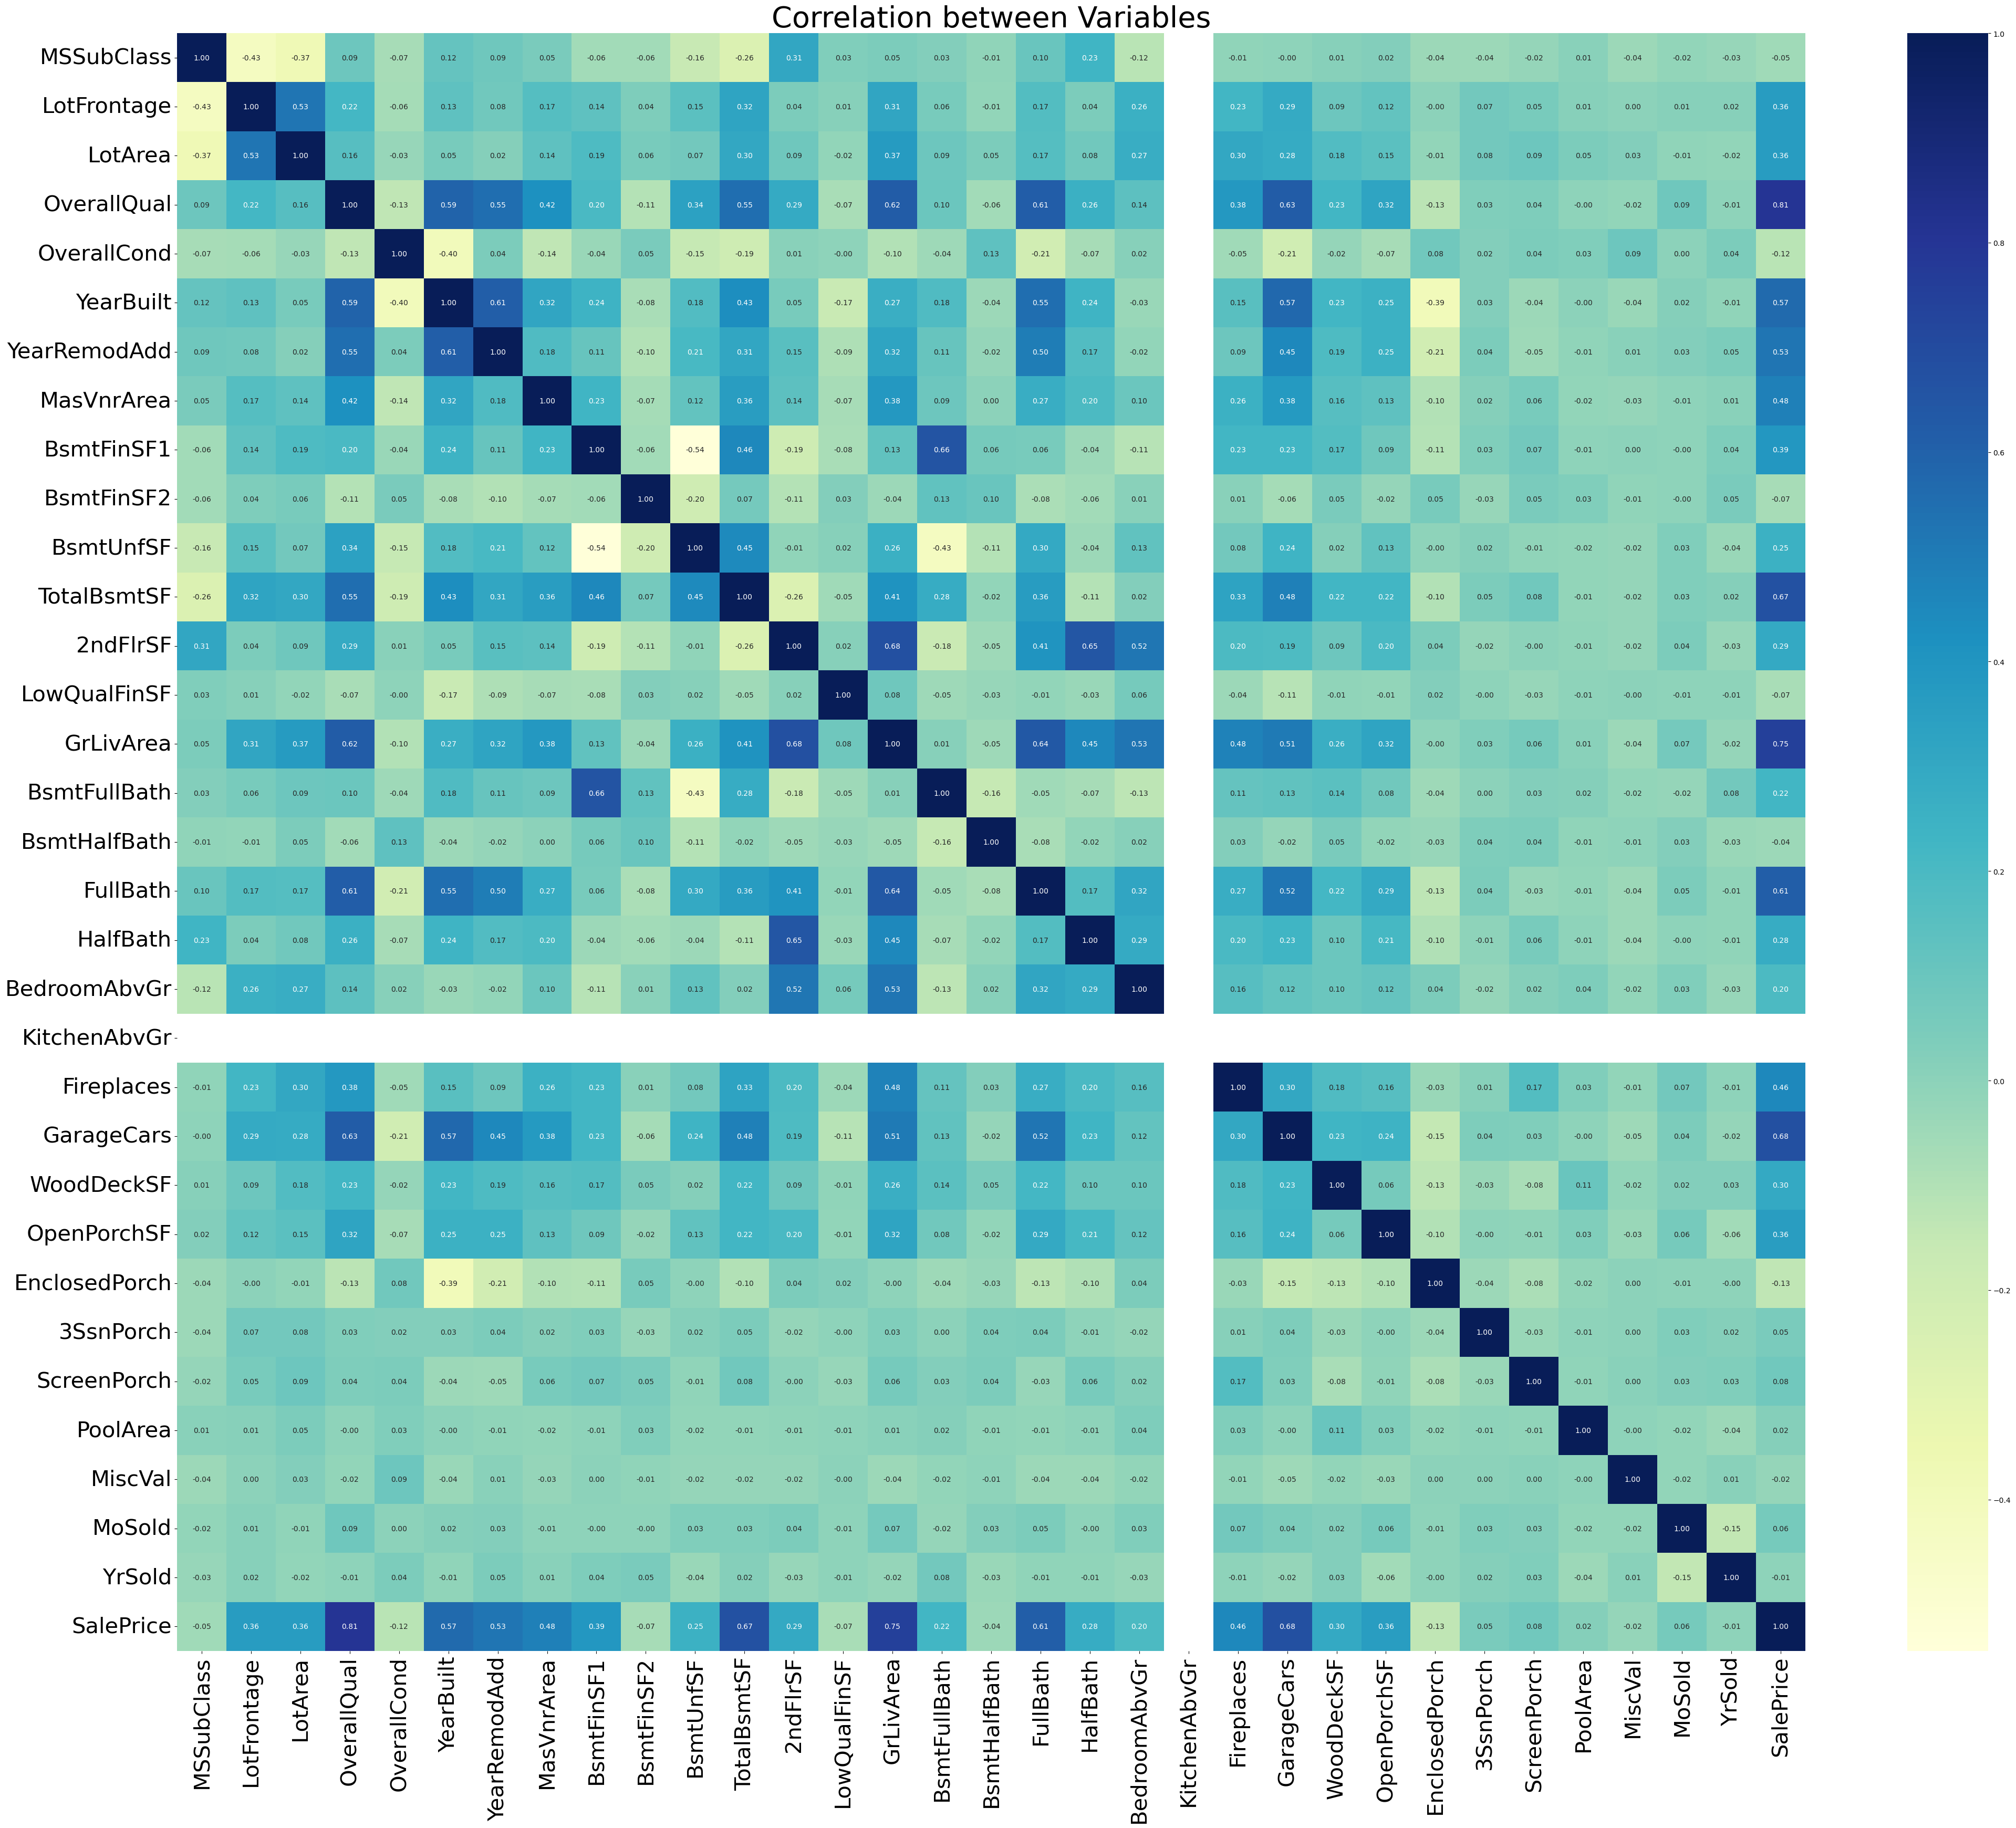

In [23]:
# plotting correlations on a heatmap after dropping the highly correlated variables

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
house_num = house.select_dtypes(include=['float64', 'int64'])
cor = house_num.corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

In [24]:
#Check which columns containg categorical data
#house_categorical=house.select_dtypes(include=['object'])
#house_categorical.head()

In [25]:
label_encoding_columns = ['Utilities','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                       'GarageCond','GarageQual','GarageFinish','KitchenQual','HeatingQC']

house['Utilities'].replace({"ELO":"1", "NoSeWa":2, "NoSewr":3, "AllPub":3},inplace=True)
house['HouseStyle'].replace({"1Story":1, "1.5Unf":2, "1.5Fin":3, "2Story":4,"2.5Unf":5,'2.5Fin':6,'SLvl':7,'SFoyer':8},inplace = True)
house['ExterQual'].replace({"Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5},inplace = True)
house['ExterCond'].replace({"Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5},inplace = True)
house['BsmtQual'].replace({"Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5},inplace = True)
house['BsmtCond'].replace({"Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5},inplace = True)
house['BsmtExposure'].replace({"NA":1, "No":2, "Mn":3, "Av":4,"Gd":5},inplace = True)
house['BsmtFinType1'].replace({"NA":1, "Unf":2, "LwQ":3, "Rec":4,"BLQ":5,'ALQ':6,'GLQ':7},inplace = True)
house['BsmtFinType2'].replace({"NA":1, "Unf":2, "LwQ":3, "Rec":4,"BLQ":5,'ALQ':6,'GLQ':7},inplace = True)
house['HeatingQC'].replace({"Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5},inplace = True)
house['GarageCond'].replace({"NA":1, "Po":2,"Fa":3,"TA":4, "Gd":5,"Ex":6},inplace = True)
house['GarageQual'].replace({"NA":1, "Po":2,"Fa":3,"TA":4, "Gd":5,"Ex":6},inplace = True)
house['GarageFinish'].replace({"NA":1, "Unf":2,"RFn":3,"Fin":4},inplace = True)
house['KitchenQual'].replace({"Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5},inplace = True)

In [26]:
house_categorical=house.select_dtypes(include=['object'])
house_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1356 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1356 non-null   object
 1   Street         1356 non-null   object
 2   LotShape       1356 non-null   object
 3   LandContour    1356 non-null   object
 4   LotConfig      1356 non-null   object
 5   LandSlope      1356 non-null   object
 6   Neighborhood   1356 non-null   object
 7   Condition1     1356 non-null   object
 8   Condition2     1356 non-null   object
 9   BldgType       1356 non-null   object
 10  RoofStyle      1356 non-null   object
 11  RoofMatl       1356 non-null   object
 12  Exterior1st    1356 non-null   object
 13  Exterior2nd    1356 non-null   object
 14  Foundation     1356 non-null   object
 15  Heating        1356 non-null   object
 16  CentralAir     1356 non-null   object
 17  Electrical     1356 non-null   object
 18  Functional     1356 non-null   ob

In [27]:
# Convert categorical value into Dummy variables (one hot encoding)
house_dummies = pd.get_dummies(house_categorical,drop_first=True,dtype='int32')
house_dummies.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=134)

In [28]:
# drop categorical variables from the dataset and save as predictor variable X
X= house.drop(list(label_encoding_columns), axis=1)

In [29]:
print(len(X.columns))
print(len(house.columns))

56
70


In [30]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [31]:
#removing response variable from the set
X = X.drop(['SalePrice'], axis=1)
X = X.drop(list(house_categorical),axis=1)

In [32]:
y = house['SalePrice'] # response variable in Y

In [33]:
# storing column names in cols (the df is converted to a numpy array)
# Standardize a dataset along any axis
# Center to the mean and component wise scale to unit variance.
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=166)

In [34]:
# split into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [35]:
## Create the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [36]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-28558808030598.54
[-1.28569850e+03  7.76681302e+02  5.90015122e+03  1.28807289e+04
  5.37937247e+03  9.29789786e+03  2.00320775e+03  2.28352608e+03
  3.33344016e+16  1.06877471e+16  3.41003826e+16 -3.10839358e+16
 -1.63200000e+03 -1.89075000e+03  2.84125000e+04  1.37450000e+03
 -5.73000000e+02  1.84287500e+03  2.85050000e+03 -4.68300000e+03
  1.07362425e+15  1.83500000e+02  5.10250000e+03  6.08250000e+02
  1.48550000e+03  1.05500000e+03  8.45125000e+02  1.96587500e+03
  2.65250000e+02  4.43556250e+03 -1.82112500e+03  3.00250000e+02
  1.83650000e+03  1.13100000e+03  6.61075000e+03  4.53728125e+03
  2.01000000e+03 -1.17500000e+01 -9.55125000e+02  6.27000000e+02
  2.13850000e+03 -7.47500000e+02  1.24000000e+02  1.19450000e+03
 -5.99250000e+02 -3.53500000e+02  1.12500000e+02  3.25500000e+02
 -3.30718750e+02  2.54171875e+02  8.57625000e+02  1.21750000e+02
 -1.24900000e+03 -5.34675000e+03  6.15000000e+02 -3.80050000e+03
 -5.18100000e+03 -2.15025000e+03  1.07000000e+02 -4.49806250e+03
 -8.48

In [37]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test: ',r2_test_lr)
metric.append(r2_test_lr)

r2 train:  0.9282897435582766
r2 test:  -2.1632145272702687e+21


In [38]:
from sklearn.model_selection import GridSearchCV
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
# Printing the best hyperparameter alpha
best_alpha_ridge = ridge_model_cv.best_params_
print(best_alpha_ridge)
print(ridge_model_cv.best_score_)

{'alpha': 100}
-17140.546304267198


In [40]:
alpha =100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train) 

Ridge(alpha=100)

In [41]:
# Lets calculate some metrics such as R2 score

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("R2 Train = " ,r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Test = " ,r2_test)


R2 Train =  0.9224516951130007
R2 Test =  0.8919833627008183


In [42]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
best_alpha = lasso_model_cv.best_params_
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 500}
-16747.63485409795


In [44]:
alpha =500
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [45]:
lasso.coef_

array([-2.71909880e+03,  1.18110178e+03,  3.88103677e+03,  1.34643930e+04,
        4.38173858e+03,  7.17588937e+03,  2.40869066e+03,  2.00371205e+03,
        9.37269180e+03,  1.02404392e+03, -0.00000000e+00,  1.08810111e+04,
        0.00000000e+00, -1.64894498e+03,  2.79496628e+04,  1.21997595e+03,
       -1.56914363e+02,  3.60107280e+02,  1.57686332e+03, -3.05902165e+03,
        0.00000000e+00,  5.24636831e+02,  5.16470680e+03,  9.88505430e+01,
        7.53386550e+02,  0.00000000e+00,  2.60887516e+01,  1.24019177e+03,
        0.00000000e+00,  0.00000000e+00, -8.26603578e+02,  3.15574519e+02,
       -0.00000000e+00, -0.00000000e+00,  1.03315937e+03, -0.00000000e+00,
        1.04256201e+03,  1.32234621e+02, -3.77542474e+02, -0.00000000e+00,
        1.79754111e+03, -0.00000000e+00, -0.00000000e+00,  1.02909948e+03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.78165235e+02,  2.08393139e+03,
        0.00000000e+00, -

In [46]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("R2 Train = " ,r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Test = " , r2_test)



R2 Train =  0.9194897870902191
R2 Test =  0.8979673636359611


Text(0.5, 0, 'Errors')

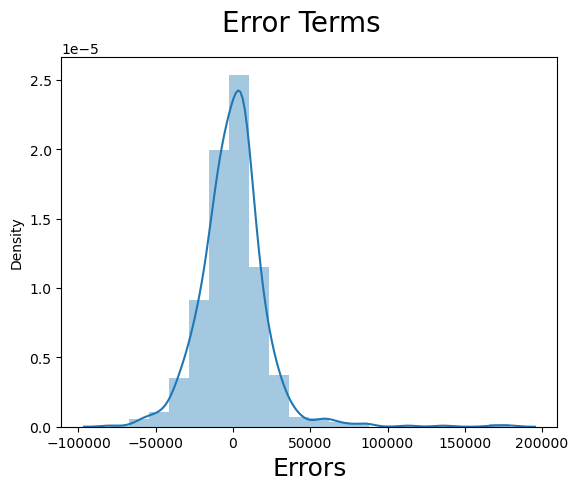

In [47]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [48]:
## Subjective questions
## Double the value of alpha - alpha = 200
alpha =200
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=200)

In [49]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("R2 Train = " ,r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Test = " ,r2_test)


R2 Train =  0.9173760514789697
R2 Test =  0.8936772890008003


In [50]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge doubled alhpa'] = ridge.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge doubled alhpa'], ascending=False)

,Ridge doubled alhpa
GrLivArea,1.404167e+04
OverallQual,1.150305e+04
TotalBsmtSF,1.093596e+04
BsmtFinSF1,8.686496e+03
Neighborhood_NridgHt,7.211396e+03
GarageCars,6.133809e+03
LotArea,4.796357e+03
Neighborhood_StoneBr,4.754218e+03
FullBath,4.081965e+03
YearRemodAdd,3.986445e+03


In [51]:
alpha =1000
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [52]:

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("R2 Train = " ,r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 Test = " ,r2_test)


R2 Train =  0.9114910208660094
R2 Test =  0.8965755850594207


In [53]:
lasso.coef_

array([-3.12783642e+03,  1.25373458e+03,  3.63737300e+03,  1.45644353e+04,
        3.55821026e+03,  5.77634786e+03,  2.57959049e+03,  1.86968593e+03,
        9.10183548e+03,  0.00000000e+00, -0.00000000e+00,  1.10747535e+04,
        0.00000000e+00, -1.42144601e+03,  2.78866991e+04,  1.25259598e+03,
       -0.00000000e+00,  0.00000000e+00,  9.80682891e+02, -1.90210194e+03,
        0.00000000e+00,  2.48899594e+02,  5.21258399e+03,  0.00000000e+00,
        4.04746197e+02, -0.00000000e+00,  0.00000000e+00,  8.05694405e+02,
        0.00000000e+00,  0.00000000e+00, -2.13707640e+02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  6.61950648e+02, -0.00000000e+00,
        5.34700595e+02,  7.94201591e+00, -1.40864657e+01, -0.00000000e+00,
        1.34520085e+03, -0.00000000e+00, -0.00000000e+00,  8.51524935e+02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.45485308e+03,
        0.00000000e+00,  

Text(0.5, 0, 'Errors')

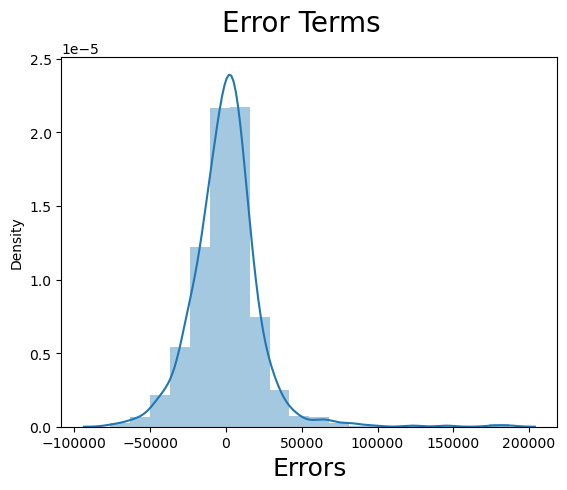

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [55]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso doubled alhpa'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso doubled alhpa'], ascending=False)

,Lasso doubled alhpa
GrLivArea,27886.699104
OverallQual,14564.435292
TotalBsmtSF,11074.753483
BsmtFinSF1,9101.835483
Neighborhood_NridgHt,8343.515626
SaleType_New,7057.844616
YearBuilt,5776.347856
GarageCars,5212.583989
Neighborhood_StoneBr,4407.373960
LotArea,3637.373004


In [56]:
## Removing the top five predictor variables

top_5_predictors = ['GrLivArea','OverallQual','TotalBsmtSF','BsmtFinSF1']

In [57]:
# drop categorical variables from the dataset and save as predictor variable X
X_new = house.drop(list(top_5_predictors), axis=1)

In [58]:
#removing response variable from the set
X_new = X_new.drop(['SalePrice'], axis=1)
X_new = X_new.drop(list(house_categorical),axis=1)

In [59]:
X_new = pd.concat([X_new,house_dummies],axis=1)

In [60]:
X_new.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Utilities', 'HouseStyle',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=176)

In [61]:
y_new = house['SalePrice']

In [62]:
# split into train and test
X_train_new, X_test_new, y_train_new,  y_test_new = train_test_split(X_new, y_new, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [63]:
from sklearn.model_selection import GridSearchCV
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_new = Ridge()

# cross validation
folds = 5
ridge_new_model_cv = GridSearchCV(estimator = ridge_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_new_model_cv.fit(X_train_new, y_train_new) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
# Printing the best hyperparameter alpha
best_alpha_ridge = ridge_new_model_cv.best_params_
print(best_alpha_ridge)
print(ridge_new_model_cv.best_score_)

{'alpha': 7.0}
-20723.246356819298


In [65]:
alpha =7
ridge_new = Ridge(alpha=alpha)      
ridge_new.fit(X_train_new, y_train_new) 

Ridge(alpha=7)

In [66]:
#important predictor variables
betas = pd.DataFrame(index=X_train_new.columns)
betas.rows = X_train_new.columns
betas['Ridge Remove top five predictors'] = ridge_new.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge Remove top five predictors'], ascending=False)

,Ridge Remove top five predictors
Neighborhood_StoneBr,31111.745812
Neighborhood_NridgHt,27111.549408
Neighborhood_Crawfor,18511.803511
Exterior1st_BrkFace,18202.365105
Neighborhood_NoRidge,14832.354815
FullBath,14592.083239
BsmtQual,13647.585153
KitchenQual,13028.790671
ExterQual,12425.238090
Street_Pave,12331.953198
